<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Feature_Importance_Logistic_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
df = df[df['n/m']==2]

print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

700


In [2]:
X_modified = X.drop(['indeks','range', 'subtype'], axis=1)
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
#print(shuffled.head())
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
print(X_modified.head())
#X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)

   class    n   m  n/m  (n/m)^2  (n/m)^3  m/n  (m/n)^2  (m/n)^3  av.length  \
0      1  100  50  2.0      4.0      8.0  0.5     0.25    0.125  52.730000   
1      1   80  40  2.0      4.0      8.0  0.5     0.25    0.125  54.037498   
2      2   60  30  2.0      4.0      8.0  0.5     0.25    0.125  56.883335   
3      7   20  10  2.0      4.0      8.0  0.5     0.25    0.125  85.449997   
4      2   20  10  2.0      4.0      8.0  0.5     0.25    0.125  55.349998   

     std.dev  median  min  max   k  
0  29.015100    53.0    2   98  61  
1  30.850988    63.0    2   99  52  
2  23.682283    62.5   20  100  42  
3  20.828814    90.0   42  111  17  
4  20.396788    55.0   21   98  17  


In [3]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=0)
#oversample.fit(X_modified, y_encoded)
X_modified, y_encoded = oversample.fit_resample(X_modified, y_encoded)

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded


y_new = []
for val in y_encoded:
  if(val[0]==1):
    y_new.append(0)
  elif(val[1]==1):
    y_new.append(1)
  elif(val[2]==1):
    y_new.append(2)
  else:
    y_new.append(3)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.00278284 0.13912653 0.13912653 0.         0.         0.
 0.         0.         0.         1.         0.32401091 0.17694
 0.20457624 0.55786094 0.07596514]


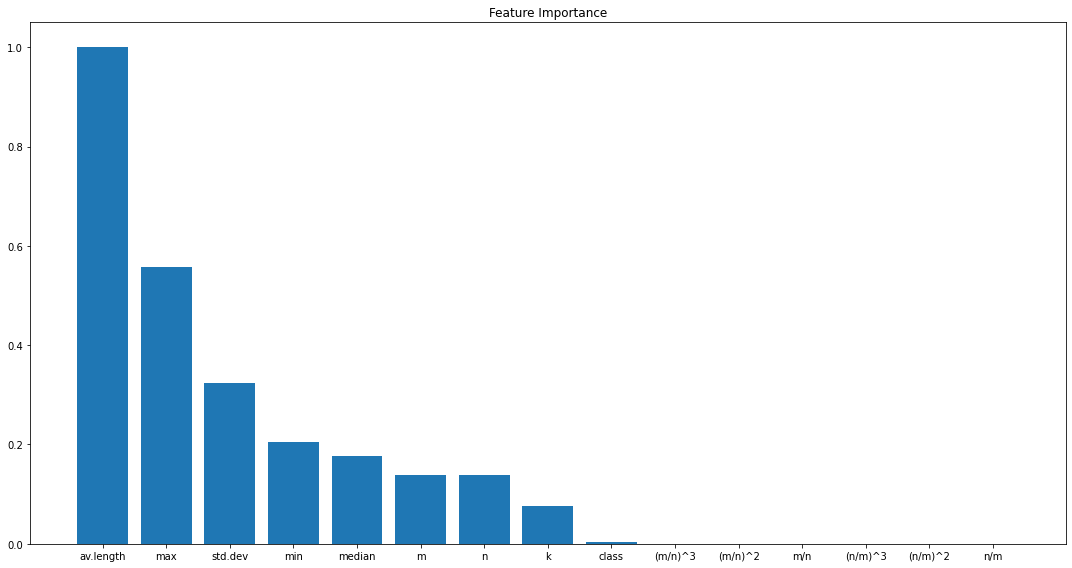

In [4]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.83)

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

X_copy = X_modified
X_modified = sc.fit_transform(X_modified)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_modified, y_new)

importances = model.coef_[0]
importances = abs(importances)

importances = (importances-np.min(importances))/np.ptp(importances)

sorted_indices = np.argsort(importances)[::-1]
feat_labels = X_copy.columns[1:]

print(importances)

plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.bar(range(X_copy.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_copy.shape[1]), X_copy.columns[sorted_indices])
plt.tight_layout()
plt.show()
